## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils (1).py


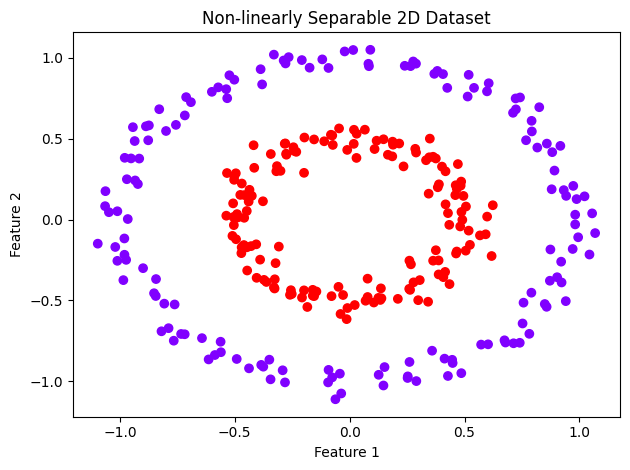

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense, Dropout
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers.legacy import SGD as SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###
model = Sequential()
model.add(Dense(units=1, input_dim=2))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
model.compile(loss="binary_crossentropy", optimizer=sgd)

Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size = 16, epochs= 300)

Epoch 1/300
15/15 [==============================] - 1s 3ms/step - loss: 5.9588
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 5.8005
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 5.4520
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 5.0597
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 3.7541
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 3.8918
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 3.8548
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 3.6429
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 3.6395
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 3.6356
Epoch 11/300
15/15 [==============================] - 0s 3ms/step - loss: 3.6291
Epoch 12/300
15/15 [==============================] - 0s 3ms/step - loss: 3.6268
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y,y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    correct_predictions = sum(1 for true, pred in zip(y, y_pred_classes) if true==pred)
    total = len(y)
    return correct_predictions / total

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.35


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

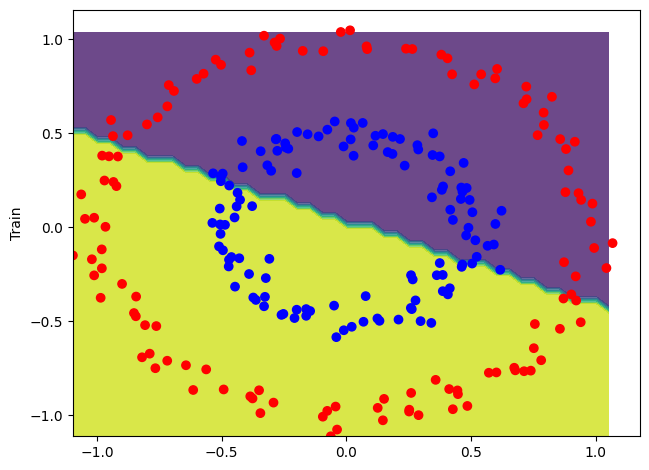

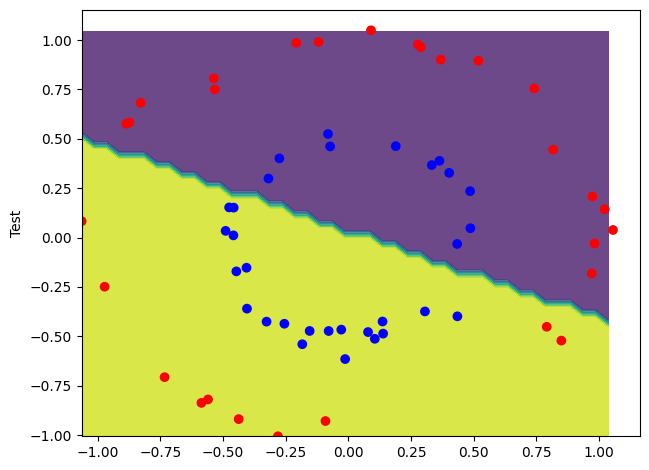

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units
    model.add(Dense(units=2, input_dim=2, activation="relu"))

    # Add a final output layer with 1 unit
    model.add(Dense(units=1, activation="sigmoid"))


    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
model.fit(X_train, y_train, batch_size = 16, epochs= 300)

Epoch 1/300
15/15 [==============================] - 1s 3ms/step - loss: 0.6785
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6782
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6778
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6775
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6771
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6769
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6764
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6761
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6758
Epoch 10/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6755
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6752
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds = model.predict(X_test)
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

2/2 [==============================] - 0s 7ms/step
The accuracy is: 0.85


57/57 [==============================] - 0s 3ms/step


Text(22.347222222222214, 0.5, 'Test')

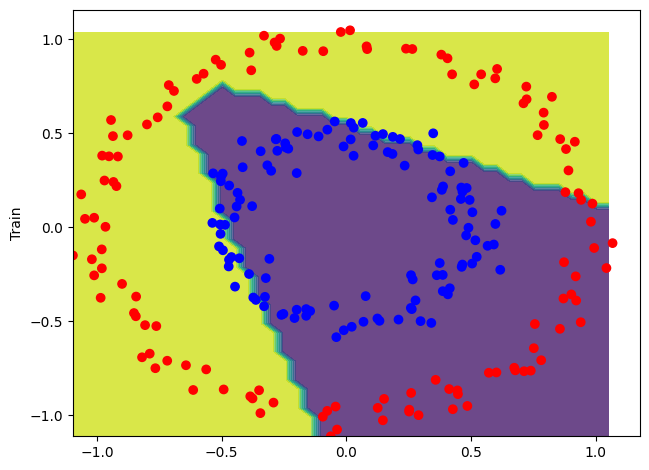

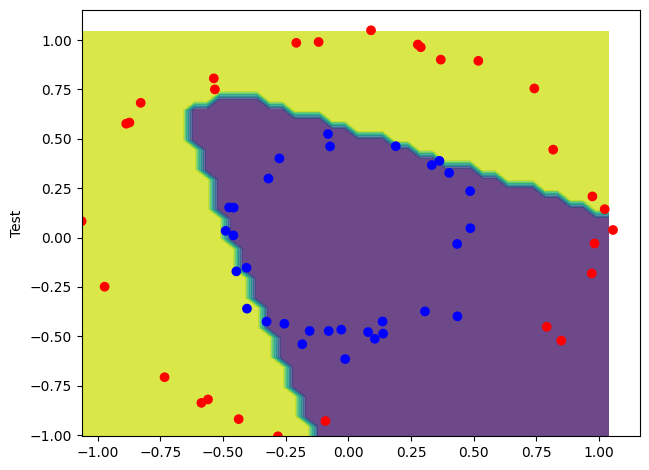

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    # Add a hidden layer with 10 units and 'relu' activation function
    model.add(Dense(units=10, input_dim=2, activation='relu'))

    # Add another hidden layer with 5 units and 'relu' activation function
    model.add(Dense(units=5, activation='relu'))

    # Add the readout layer with 2 units and 'softmax' activation function
    model.add(Dense(units=2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, batch_size = 16, epochs= 300)

Epoch 1/300
15/15 [==============================] - 1s 3ms/step - loss: 0.7383 - accuracy: 0.4833
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5208
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7297 - accuracy: 0.4958
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7266 - accuracy: 0.4833
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.4667
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.4708
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.4167
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7174 - accuracy: 0.3667
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.3417
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7140 - accuracy: 0.2875
Epoch 11/

Q3. Compute accuracy by using your own function

In [ ]:
import numpy as np

def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    correct_predictions = np.sum(np.array_equal(true, pred) for true, pred in zip(y, y_pred_classes))
    total = len(y)
    return correct_predictions / total

y_test_vectorized = to_categorical(y_test)
y_preds = model.predict(X_test)
print(f'The accuracy is: {accuracy(y_test_vectorized, y_preds)}')

2/2 [==============================] - 0s 6ms/step
The accuracy is: 1.0


<ipython-input-23-4756f96be91f>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  correct_predictions = np.sum(np.array_equal(true, pred) for true, pred in zip(y, y_pred_classes))


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

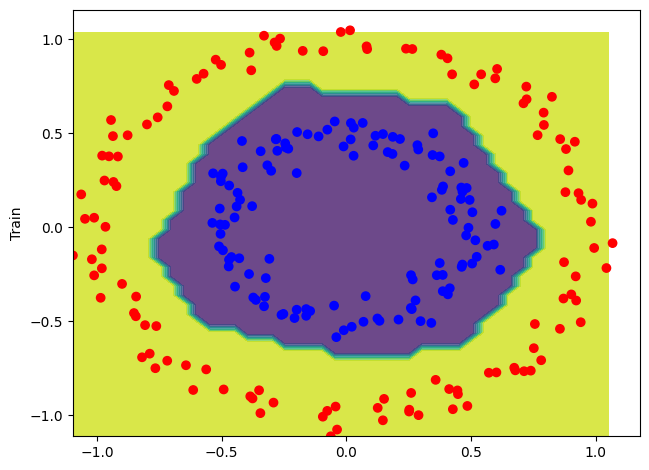

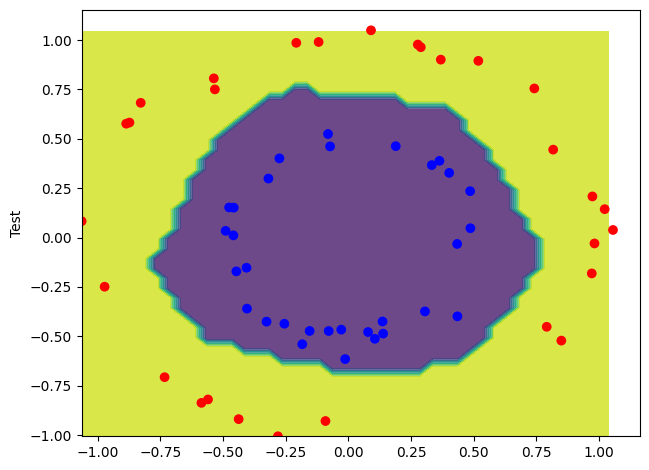

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


# Exercise 4:
### Short answer-questions
\lb remove this

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- If the learning rate is too high for full batch gradient descent, the algorithm may fail to converge to find an optimal minimum of cost function. This issue is more severe for stochastic gradient descent, because SGD updates are based on individual data points, and high learning rates can lead to more erratic movements.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- Geometric Transformation is an example as different orientations and scales may be benefitial when it comes to classifying dogs and cats, while for handwritten digit, rotating and flipping a digit won't create additional information.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans- Network A is simpler with computational efficiency, while Network B can potentially learn more abstract and hierarchical features, making the network more capable of capturing complex patterns. The choice between them depends on the specific requirements of the task, available computational resources, and the desired depth of feature representation.


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving CreditDefault_training (1).csv to CreditDefault_training (1) (1).csv


In [ ]:
uploaded2 = files.upload()

Saving CreditDefault_Xtest (1).csv to CreditDefault_Xtest (1) (1).csv


In [ ]:
#standardization of continuous variables of the training set
from sklearn.preprocessing import StandardScaler

# Split training data into X and y
df_train_cd = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training (1) (1).csv']))
df_test_cd = pd.read_csv(io.BytesIO(uploaded2['CreditDefault_Xtest (1) (1).csv']))

X_train_cd = df_train_cd.drop('default.payment.next.month', axis=1)
y = df_train_cd['default.payment.next.month']

# Normalizing Training Dataset
categorical_data_train_cd = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical_data_train_cd = X_train_cd.columns.drop(categorical_data_train_cd)

# Extracting numerical data for scaling
numerical_values_train_cd = X_train_cd[numerical_data_train_cd]

#Performing scaling
scaler = StandardScaler()
scaled_data_train_cd = scaler.fit_transform(numerical_values_train_cd)
numerical_scaled_train_cd_df = pd.DataFrame(scaled_data_train_cd, columns=numerical_data_train_cd)

numerical_scaled_train_cd_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,0.071315,-0.262679,-0.267721,1.270320
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,-0.178872,-0.109918,0.049149,-0.300705
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,-0.157124,-0.108494,0.057642,1.564334
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,-0.332890,-0.268056,-0.288256,-0.300705
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,-0.332890,-0.215343,-0.230083,-0.242460


In [ ]:
#standardization of continuous variables of the test set
from sklearn.preprocessing import StandardScaler

X_test_cd = df_test_cd

# Normalizing Test Dataset
categorical_data_test_cd = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical_data_test_cd = X_test_cd.columns.drop(categorical_data_test_cd)

# Extracting numerical data for scaling
numerical_values_test_cd = X_test_cd[numerical_data_test_cd]

#Performing scaling
scaler = StandardScaler()
scaled_data_test_cd = scaler.fit_transform(numerical_values_test_cd)
numerical_scaled_test_cd_df = pd.DataFrame(scaled_data_test_cd, columns=numerical_data_test_cd)

numerical_scaled_test_cd_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.630510,0.620300,1.634425,1.512066,1.351052,-0.369743,-0.607774,-0.444210,-0.082065,-0.172661,-0.223336,-0.114938,0.421282,-0.196015
1,-0.863285,-0.044189,-0.029025,-0.424391,-0.422265,-0.382195,-0.355548,-0.330376,-0.279571,0.078449,-0.233273,-0.258322,-0.285271,-0.247379
2,-0.630510,0.731049,-0.452793,-0.420992,-0.387009,-0.345811,-0.307403,-0.293458,-0.277090,-0.295516,-0.233030,-0.258322,-0.328137,-0.183797
3,-0.009777,-0.930174,0.713256,0.435431,0.536011,-0.034137,0.033896,-0.646624,-0.135306,-0.160510,-0.189408,-0.195212,-0.328137,-0.277784
4,-1.018468,-0.597929,-0.571248,-0.515319,-0.477150,-0.414975,-0.375876,-0.308253,-0.177841,-0.275265,-0.174867,-0.258322,-0.137056,-0.230790


In [ ]:
# one-hot encoding of categorical variables of the training dataset
from sklearn.preprocessing import OneHotEncoder

# Define the first set of categorical columns
categorical_data_train_cd_1 = ['SEX', 'EDUCATION', 'MARRIAGE']

# One-hot encoding for the first set of categorical variables
encoder_1 = OneHotEncoder(sparse=False)
categorical_encoded_train_cd_1 = encoder_1.fit_transform(df_train_cd[categorical_data_train_cd_1])
categorical_encoded_train_cd_df_1 = pd.DataFrame(categorical_encoded_train_cd_1, columns=encoder_1.get_feature_names_out(categorical_data_train_cd_1))

# Define the second set of categorical columns (PAY_1 to PAY_6)
categorical_data_train_cd_2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_cat = [cat] * len(categorical_data_train_cd_2)

# Encoding the second set of categorical variables (PAY_1 to PAY_6)
encoder_2 = OneHotEncoder(sparse=False, categories=a_cat)
categorical_encoded_train_cd_2 = encoder_2.fit_transform(df_train_cd[categorical_data_train_cd_2])
categorical_encoded_train_cd_df_2 = pd.DataFrame(categorical_encoded_train_cd_2, columns=encoder_2.get_feature_names_out(categorical_data_train_cd_2))

# Concatenate the encoded categorical variables
categorical_encoded_train_cd_df = pd.concat([categorical_encoded_train_cd_df_1, categorical_encoded_train_cd_df_2], axis=1)

# Print the head of the concatenated DataFrame
print(categorical_encoded_train_cd_df.head())

# Print the shape of your encoded X
print(categorical_encoded_train_cd_df.shape)

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          0.0         0.0         1.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         0.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# one-hot encoding of categorical variables of the test dataset
from sklearn.preprocessing import OneHotEncoder

# Define the first set of categorical columns
categorical_data_test_cd_1 = ['SEX', 'EDUCATION', 'MARRIAGE']

# One-hot encoding for the first set of categorical variables
encoder_1 = OneHotEncoder(sparse=False)
categorical_encoded_test_cd_1 = encoder_1.fit_transform(df_test_cd[categorical_data_test_cd_1])
categorical_encoded_test_cd_df_1 = pd.DataFrame(categorical_encoded_test_cd_1, columns=encoder_1.get_feature_names_out(categorical_data_test_cd_1))

# Define the second set of categorical columns (PAY_1 to PAY_6)
categorical_data_test_cd_2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a_cat = [cat] * len(categorical_data_test_cd_2)

# Encoding the second set of categorical variables (PAY_1 to PAY_6)
encoder_2 = OneHotEncoder(sparse=False, categories=a_cat)
categorical_encoded_test_cd_2 = encoder_2.fit_transform(df_test_cd[categorical_data_test_cd_2])
categorical_encoded_test_cd_df_2 = pd.DataFrame(categorical_encoded_test_cd_2, columns=encoder_2.get_feature_names_out(categorical_data_test_cd_2))

# Concatenate the encoded categorical variables
categorical_encoded_test_cd_df = pd.concat([categorical_encoded_test_cd_df_1, categorical_encoded_test_cd_df_2], axis=1)

# Print the head of the concatenated DataFrame
print(categorical_encoded_test_cd_df.head())

# Print the shape of your encoded X
print(categorical_encoded_test_cd_df.shape)

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          1.0         1.0         0.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         1.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# one-hot encoding of target variable of the training dataset
from sklearn.preprocessing import OneHotEncoder

# Assuming 'default.payment.next.month' is your target variable
y = df_train_cd['default.payment.next.month']
encoder = OneHotEncoder(sparse=False)
y_encoded_cd = encoder.fit_transform(df_train_cd[['default.payment.next.month']])
# Create a DataFrame with the one-hot encoded target variable
y_encoded_cd_df = pd.DataFrame(y_encoded_cd, columns=encoder.get_feature_names_out(['default.payment.next.month']))

# Print the shape of the encoded y

print(y_encoded_cd_df.shape)

(3985, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Combining encoded categorical data and scaled numerical data for training dataset

numerical_scaled_train_cd_df.reset_index(drop=True, inplace=True)
categorical_encoded_train_cd_df.reset_index(drop=True, inplace=True)

combined_df_train_cd = pd.concat([numerical_scaled_train_cd_df, categorical_encoded_train_cd_df], axis=1)

combined_df_train_cd.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Combining encoded categorical data and scaled numerical data for test dataset

numerical_scaled_test_cd_df.reset_index(drop=True, inplace=True)
categorical_encoded_test_cd_df.reset_index(drop=True, inplace=True)

combined_df_test_cd = pd.concat([numerical_scaled_test_cd_df, categorical_encoded_test_cd_df], axis=1)

combined_df_test_cd.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.630510,0.620300,1.634425,1.512066,1.351052,-0.369743,-0.607774,-0.444210,-0.082065,-0.172661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.863285,-0.044189,-0.029025,-0.424391,-0.422265,-0.382195,-0.355548,-0.330376,-0.279571,0.078449,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.630510,0.731049,-0.452793,-0.420992,-0.387009,-0.345811,-0.307403,-0.293458,-0.277090,-0.295516,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.009777,-0.930174,0.713256,0.435431,0.536011,-0.034137,0.033896,-0.646624,-0.135306,-0.160510,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.018468,-0.597929,-0.571248,-0.515319,-0.477150,-0.414975,-0.375876,-0.308253,-0.177841,-0.275265,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split data into training and validation set (the code has been provided)

X = combined_df_train_cd
y = y_encoded_cd_df

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
print('X-train Shape:', X_train.shape)
print('Y-train Shape:', y_train.shape)

X-train Shape: (2789, 97)
Y-train Shape: (2789, 2)


In [ ]:
# Convert y_train and y_val to 1D arrays
y_train = y_train.values.argmax(axis=1).ravel()
y_val = y_val.values.argmax(axis=1).ravel()

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import SGD as SGD

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units=32, input_dim=97, activation='relu'))

    # Drop out layer
    model.add(Dropout(0.5))


    # Continues the process
    layer1 = Dense(units=16, input_dim=50, activation='relu')
    model.add(layer1)
    model.add(Dropout(0.5))

    layer2 = Dense(units=10, input_dim=10, activation='relu')

    model.add(layer2)
    model.add(Dropout(0.5))

    # Finally, add a readout layer
    model.add(Dense(units=1, input_dim=10, activation='sigmoid'))

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])


    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.6444 - accuracy: 0.6888
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.7361
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7515
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7573
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7637
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7623
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7637
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7634
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7659
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7648
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
y_pred = model.predict(X_val)

38/38 [==============================] - 0s 4ms/step


In [ ]:
y_pred_binary = (y_pred > 0.3).astype(int)

accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7676
Precision: 0.4876
Recall: 0.5815
F1 Score: 0.5304


Q5. Plot the ROC curve by giving appropriate names for title and axes.

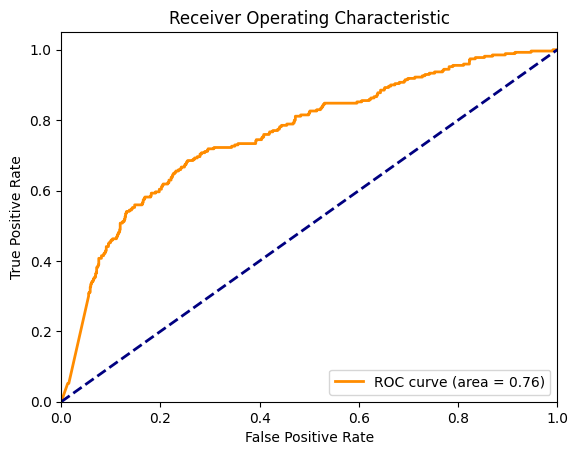

 ROC_AUC is 0.7608


In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f' ROC_AUC is {roc_auc:.4f}')

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans-

The accuracy score looks pretty good (around 76%), but if you check out the y values in the training set, there's a bias. Most of them are 0's (no default), so even if the model just predicts all 0s, it's already getting a bunch right. About 75% didn't default in the training set, and 80% isn't that much higher, so the accuracy score isn't super impressive.

Let's break down some other scores:

Precision: This tells us how good the model is at predicting positive values. It's handy for checking the accuracy of positive predictions. For example, if mislabeling something as positive when it's not is a big deal (like marking important emails as spam), precision is the go-to metric.

Recall: This one matters more when it's worse to miss positive instances than to wrongly label negatives as positives. In medical diagnoses, it's crucial to catch all the positive cases, even if that means getting some false positives. For this dataset, where we're really concerned about catching all the cases that might default, recall is a key metric.

F1 Score: This is like a balance between precision and recall. It's handy when both of these things are important, or when the classes are out of whack. Since we've got an imbalanced dataset here, F1 score is another useful metric.

AUC: This one's all about the ROC curve. It shows how well the model can tell the difference between two classes. The ROC curve looks at true positive rate (recall) and false positive rate.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
pip install tensorflow==2.12.0

In [ ]:
pip uninstall -y keras

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0


In [ ]:
pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)


In [ ]:
import keras
print(keras.__version__)

2.12.0


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate, decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()

    # Add fully-connected (Dense) hidden layers with the appropriate input dimension
    model.add(Dense(units=32, input_dim=97, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(units=16, input_dim=50, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(units=10, input_dim=10, activation=activation))
    model.add(Dropout(0.5))

    # Readout Layer
    model.add(Dense(units=1, input_dim=10, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'binary_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

<ipython-input-49-f0be3b82ac3c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
from sklearn.model_selection import StratifiedKFold

param_dist = {
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500],
    'learning_rate': [0.01, 0.001, 0.0001]
}

keras_clf = KerasClassifier(build_fn=create_model, verbose=0)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

<ipython-input-50-6686d2bcad28>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_model, verbose=0)


Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = keras_clf,
                                   param_distributions = param_dist,
                                   cv = cv)

In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters

In [ ]:
### WRITE CODE HERE
print("Best model parameters:", random_search.best_params_)

Best model parameters: {'learning_rate': 0.001, 'epochs': 200, 'batch_size': 32, 'activation': 'tanh'}


Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train, epochs=500, batch_size=16)

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE

y_val_pred = best_model.predict(X_val)

y_val_pred_binary = (y_val_pred > 0.3).astype(int)

accuracy = accuracy_score(y_val, y_val_pred_binary)
precision = precision_score(y_val, y_val_pred_binary)
recall = recall_score(y_val, y_val_pred_binary)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

38/38 [==============================] - 0s 3ms/step
Accuracy: 0.8135
Precision: 0.6063
Recall: 0.4963
F1 Score: 0.5458


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans-

The new model is doing better than the first one in a few ways:


1) it has a higher accuracy (0.8135 compared to 0.7676),
2) a better precision (0.6063 compared to 0.4876),
3) and a higher F1 score (0.5458 compared to 0.5304).


However, it's not as good in recall (0.4963 compared to 0.5815). Overall, the new model seems like an improvement, especially because of the higher accuracy and precision. But, which one is better might depend on what exactly you're looking for in your application.








### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    # Define the logistic regression model
    logreg = LogisticRegression(max_iter= 1000)

    # Define the parameter grid to search
    param_grid = {
        'penalty': ['l1', 'l2'],  # L1 and L2 regularization
        'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],  # Inverse of regularization strength
        'solver' : ['liblinear', 'saga']
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator = logreg, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)


    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print("Best Parameters:", best_params)

    ######################
    return best_model # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###

from sklearn.metrics import accuracy_score, precision_score, recall_score

best_logreg_model = logistic_regression_model(X_train, y_train)

# Fit the model on the training data
best_logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_log = best_logreg_model.predict(X_val)

# Compute accuracy
accuracy_log = accuracy_score(y_val, y_val_pred_log)
print(f"Accuracy on the validation set: {accuracy_log}")

# Compute precision
precision_log = precision_score(y_val, y_val_pred_log)
print(f"Precision on the validation set: {precision_log}")

# Compute recall
recall_log = recall_score(y_val, y_val_pred_log)
print(f"Recall on the validation set: {recall_log}")

# Compute F1 score
f1_log = 2 * (precision_log * recall_log) / (precision_log + recall_log)
print(f"F1 score on the validation set: {f1_log}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on the validation set: 0.8235785953177257
Precision on the validation set: 0.6685714285714286
Recall on the validation set: 0.43333333333333335
F1 score on the validation set: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes.

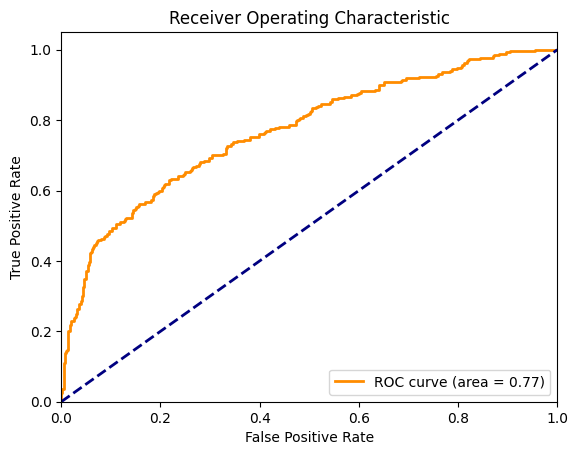

In [ ]:
### WRITE CODE HERE

# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_logreg_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###

    # Define the parameter grid to search
    param_grid = {
    'max_depth': [10, 20, 30, 40],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [100, 200, 250]
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

     # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print("Best Parameters:", best_params)


    return best_model # Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Fit the random forest model on the training data
best_rf_model = random_forest_model(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = best_rf_model.predict(X_val)

# Compute accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Accuracy on the validation set: {accuracy_rf}")

# Compute precision
precision_rf = precision_score(y_val, y_val_pred_rf)
print(f"Precision on the validation set: {precision_rf}")

# Compute recall
recall_rf = recall_score(y_val, y_val_pred_rf)
print(f"Recall on the validation set: {recall_rf}")

# Compute F1 score
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
print(f"F1 score on the validation set: {f1_rf}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Accuracy on the validation set: 0.810200668896321
Precision on the validation set: 0.6080402010050251
Recall on the validation set: 0.44814814814814813
F1 score on the validation set: 0.5159914712153517


Q16. Plot the ROC curve by giving appropriate names for title and axes.

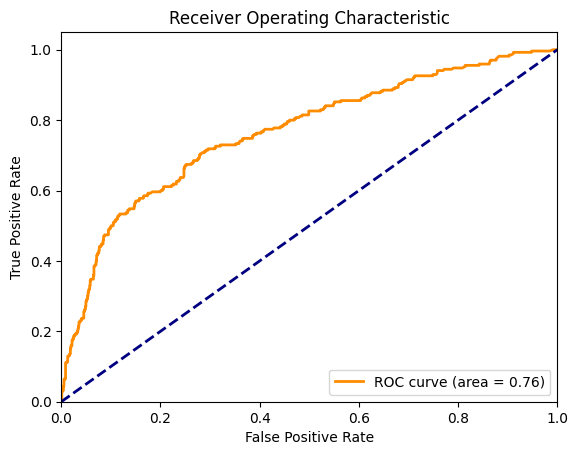

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_rf_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?




Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
### WRITE CODE HERE
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train, epochs=200, batch_size=16)

y_pred = best_model.predict(X_val)

y_pred

38/38 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])



**Neural Network (NN):**

<br>

*Performance:*
Accuracy: 0.8135
Precision: 0.6063
Recall: 0.4963
F1 Score: 0.5458

</br>

Achieved a relatively high accuracy and precision.
Potential for improvement with further fine-tuning, especially in balancing precision and recall.
Weaknesses:

<br>

Lower recall indicates a challenge in capturing positive instances effectively.

</br>

**Logistic Regression:**

<br>

*Performance:*
Accuracy: 0.8236
Precision: 0.6686
Recall: 0.4333
F1 Score: 0.5258

</br>

Demonstrated good accuracy and precision.
Well-suited for linear relationships in the data.
Weaknesses:

<br>

Lower recall suggests difficulty in capturing all positive instances, particularly in non-linear relationships.

</br>

**Random Forest:**

<br>

*Performance:*
Accuracy: 0.8102
Precision: 0.6080
Recall: 0.4481
F1 Score: 0.5160

</br>

Balanced performance with decent accuracy, precision, and recall.
Capable of handling non-linear relationships and complex datasets effectively.
Weaknesses:

<br>

While recall is better than Logistic Regression, there is still room for improvement.
</br>



---

